In [1]:
import random

import numpy as np
import torch
import math
import torch.nn as nn
from PIL import Image
from torch.autograd import Variable
from torchvision.transforms import transforms

from commons import inc_convolution, inc_convolution2, inc_max_pool, inc_max_pool2
from imagenet_classes import class_names
from vgg16 import VGG16
from vgg16_inc_v2 import IncrementalVGG16V2


/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
batch_size = 2
patch_size = 98
input_size = 224

p = (input_size - patch_size)//2
patch_locations = [(p, p)]*batch_size

loader = transforms.Compose([transforms.Resize([224, 224]), transforms.ToTensor()])
images = Image.open('./dog_resized.jpg')
images = loader(images)

images = images.unsqueeze(0)
images_batch = images.repeat(batch_size, 1, 1, 1)

image_patch = torch.cuda.FloatTensor(3, patch_size, patch_size).fill_(0)

for i,(x,y) in enumerate(patch_locations):
    images_batch[i, :, x:x+patch_size, y:y+patch_size] = image_patch

y = VGG16().forward(images_batch.cuda())

image_patches = image_patch.unsqueeze(0).repeat(batch_size, 1, 1, 1)
patch_locations = torch.from_numpy(np.array(patch_locations, dtype=np.int32))

inc_model = IncrementalVGG16V2(images, beta=1.0)

inc_model.eval()
x = inc_model.forward_gpu2(image_patches, patch_locations, patch_size, patch_size)
#print(class_names[np.argmax(x.data.cpu().numpy()[0, :])])

(tensor([[ 62,  62],
        [ 62,  62]], dtype=torch.int32, device='cuda:0'), 100, 100)
(tensor([[ 61,  61],
        [ 61,  61]], dtype=torch.int32, device='cuda:0'), 102, 102)
(tensor([[ 30,  30],
        [ 30,  30]], dtype=torch.int32, device='cuda:0'), 52, 52)
(tensor([[ 29,  29],
        [ 29,  29]], dtype=torch.int32, device='cuda:0'), 54, 54)
(tensor([[ 28,  28],
        [ 28,  28]], dtype=torch.int32, device='cuda:0'), 56, 56)
(tensor([[ 14,  14],
        [ 14,  14]], dtype=torch.int32, device='cuda:0'), 29, 29)
(tensor([[ 13,  13],
        [ 13,  13]], dtype=torch.int32, device='cuda:0'), 31, 31)
(tensor([[ 12,  12],
        [ 12,  12]], dtype=torch.int32, device='cuda:0'), 33, 33)
(tensor([[ 11,  11],
        [ 11,  11]], dtype=torch.int32, device='cuda:0'), 35, 35)
(tensor([[ 5,  5],
        [ 5,  5]], dtype=torch.int32, device='cuda:0'), 18, 18)
(tensor([[ 4,  4],
        [ 4,  4]], dtype=torch.int32, device='cuda:0'), 20, 20)
(tensor([[ 3,  3],
        [ 3,  3]], dtype=tor

In [3]:
p

63

In [4]:
s = 7
p = 0
temp = x - y[:,:,p:p+s,p:p+s]

#temp = y-x

temp = temp.cpu().data.numpy()
print(np.max(np.abs(temp)))

5.722046e-06


In [5]:
np.where(np.abs(temp) > 1e-3)

(array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64))

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

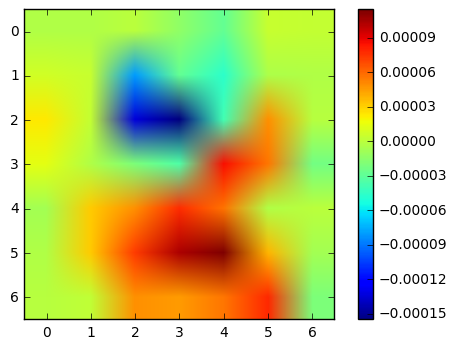

In [7]:
plt.imshow(np.sum(np.sum(temp, axis=0), axis=0))
plt.colorbar()

In [16]:
# temp[0,1,:,:]
temp[0,0,:,:]

array([[ 0.        ,  0.9422619 ,  0.42315984,  0.16826856, -0.13588613,
        -0.30838147,  0.00839627],
       [ 0.        , -1.4696991 , -2.1188765 , -1.87977   , -0.74578035,
        -0.76012486,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.438925  ,  0.2145718 ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.04166818,  0.00974423],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.3505612 , -0.27796707],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [9]:
x[1,196]

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [21]:
y[1,196,p:p+s,p:p+s]

tensor([[ 1.3068,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 1.5986,  0.4063,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 1.5879,  0.0434,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]], device='cuda:0')

In [10]:
y.shape, x.shape

(torch.Size([2, 256, 28, 28]), torch.Size([2, 256, 6, 6]))

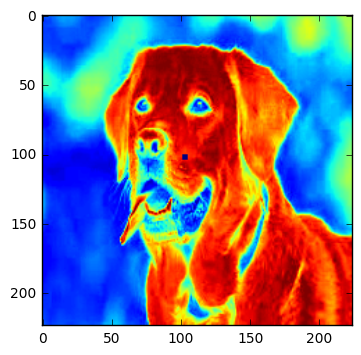

In [10]:
plt.imshow(images_batch[0,0,:,:])

In [11]:
x.shape

torch.Size([2, 256, 6, 6])